<img src='https://institucional.ifood.com.br/images/share.jpg'>

# Metadata

 X   Column               Description
---  ------               --------------
 1   Year_Birth           Ano de nascimento
 2   Education            nível de educação dos clientes
 3   Marital_Status       estado civil dos clientes
 4   Income               renda familiar anual dos clientes
 5   Kidhome              número de crianças pequenas na casa do cliente
 6   Teenhome             número de adolescentes na casa do cliente
 7   Dt_Customer          data de inscrição do cliente na empresa
 8   Recency              número de dias desde a última compra
 9   MntWines             valor gasto em vinhos nos últimos 2 anos
 10  MntFruits            valor gasto em frutas nos últimos 2 anos
 11  MntMeatProducts      valor gasto com carnes nos últimos 2 anos
 12  MntFishProducts      valor gasto em produtos pesqueiros nos últimos 2 anos
 13  MntSweetProducts     valor gasto em produtos doces nos últimos 2 anos
 14  MntGoldProds         valor gasto em produtos ouro nos últimos 2 anos
 15  NumDealsPurchases    número de compras feitas com desconto
 16  NumWebPurchases      número de compras feitas através do site da empresa
 17  NumCatalogPurchases  número de compras feitas usando catalogo
 18  NumStorePurchases    número de compras feitas diretamente nas lojas
 19  NumWebVisitsMonth    número de visitas ao site da empresa no último mês
 20  AcceptedCmp3         1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
 21  AcceptedCmp4         1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
 22  AcceptedCmp5         1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
 23  AcceptedCmp1         1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
 24  AcceptedCmp2         1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
 25  Complain             1 se o cliente reclamou nos últimos 2 anos
 28  Response             1 se o cliente aceitou a oferta na última campanha, 0 caso contrário

# Import libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [11]:
3674000 / df['Response'].value_counts()[1]

11000.0

In [63]:
520/618 * 0.94

0.7909385113268608

In [64]:
98/618 * 0.55

0.0872168284789644

In [76]:
10000*0.09

900.0

In [86]:
2240 * 11000

24640000

In [81]:
(9900-6720) - (-3046)

6226

In [83]:
3046

3046

In [85]:
9272*100 / 3046

304.3992120814182

# Data cleaning

First, let's start by cleaning the data and throwing away some columns that are not important

In [2]:
# Actually we can drop "ID", "Z_CostContact" and "Z_Revenue" columns because we will not use it.
df = df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

# Drop duplicates
df = df.drop_duplicates()

In [3]:
# Lets check the missing values and fill them with appropriate method.
def null_values(df):
    nv=pd.DataFrame(df.isnull().sum()).rename(columns={0:'Missing_Records'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
null_values(df)

,Missing_Records
Income,24


In [4]:
# We can fill the null values with mean.
df['Income'] = df['Income'].fillna(float(round(df['Income'].mean())))
null_values(df).sum()

Missing_Records    0.0
dtype: float64

In [5]:
# There are lots of outliers in columns but we will not apply winsorize or another methods to them.
# Because we may have information loss.
# They may represent another clusters.
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
((df[df.columns ]< (Q1 - 1.5 * IQR)) | (df[df.columns] > (Q3 + 1.5 * IQR))).sum()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


AcceptedCmp1           135
AcceptedCmp2            26
AcceptedCmp3           151
AcceptedCmp4           158
AcceptedCmp5           148
Complain                20
Dt_Customer              0
Education                0
Income                   8
Kidhome                  0
Marital_Status           0
MntFishProducts        203
MntFruits              207
MntGoldProds           187
MntMeatProducts        174
MntSweetProducts       225
MntWines                33
NumCatalogPurchases     22
NumDealsPurchases       78
NumStorePurchases        0
NumWebPurchases          4
NumWebVisitsMonth        8
Recency                  0
Response               313
Teenhome                 0
Year_Birth               3
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2057 non-null   int64  
 1   Education            2057 non-null   object 
 2   Marital_Status       2057 non-null   object 
 3   Income               2057 non-null   float64
 4   Kidhome              2057 non-null   int64  
 5   Teenhome             2057 non-null   int64  
 6   Dt_Customer          2057 non-null   object 
 7   Recency              2057 non-null   int64  
 8   MntWines             2057 non-null   int64  
 9   MntFruits            2057 non-null   int64  
 10  MntMeatProducts      2057 non-null   int64  
 11  MntFishProducts      2057 non-null   int64  
 12  MntSweetProducts     2057 non-null   int64  
 13  MntGoldProds         2057 non-null   int64  
 14  NumDealsPurchases    2057 non-null   int64  
 15  NumWebPurchases      2057 non-null   i

In [12]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,...,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,1968.783179,52059.151191,0.445309,0.509480,48.964511,304.065143,26.240642,167.777346,37.343704,27.189596,...,2.661643,5.771998,5.319397,0.073408,0.076811,0.071949,0.065630,0.012640,0.009723,0.152163
std,11.975439,21463.894646,0.537548,0.546507,29.000590,336.547172,39.759478,228.334873,54.666677,41.720151,...,2.934309,3.239325,2.440454,0.260868,0.266356,0.258467,0.247694,0.111741,0.098148,0.359266
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35701.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,52034.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68148.000000,1.000000,1.000000,74.000000,504.000000,33.000000,230.000000,50.000000,34.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# View features

### Income

<AxesSubplot:>

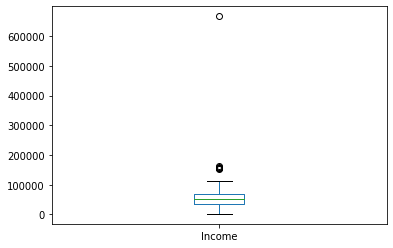

In [6]:
df['Income'].plot.box()

Remove row that contain Income with value 666666.0

In [7]:
# Remove outliers
df = df[df['Income']<200000]

### Year Birth

<AxesSubplot:>

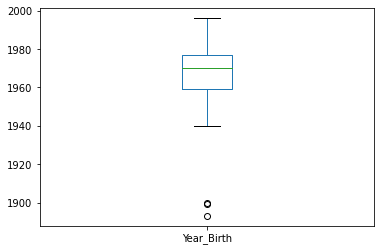

In [8]:
df['Year_Birth'].plot.box()

In [9]:
df[df['Year_Birth']<1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,...,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,...,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,...,6,4,1,0,0,1,0,0,0,0


### Response

<AxesSubplot:>

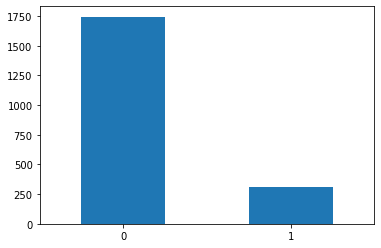

In [10]:
# Imbalanced data
df['Response'].value_counts().plot.bar(rot=0)

# Feature Engineering

Creating features for other visions of the data

In [13]:
df['Dt_Customer_Year'] = df['Dt_Customer'].str.split('-').str[0].astype('int64') # Year
df['Dt_Customer_Month'] = df['Dt_Customer'].str.split('-').str[1].astype('int64') # Month

df = df.drop(columns=['Dt_Customer'])

In [14]:
# Feature year range
def birth(year):
    year_min = year - year%10
    year_max = year_min + 10
    
    return f'{year_min} - {year_max}'

In [15]:
# Feature Generation
def generation(year):
    if year <= 1964:
        gen = 'Boomers (year < 1964)'
    elif year >= 1965 and year <= 1980:
        gen = 'Gen X (1965 < year < 1980)'
    elif year >= 1981 and year <= 1996:
        gen = 'Gen Y (1981 < year < 1996)'
    elif year >= 1997 and year <= 2010:
        gen = 'Gen Z (1997 < year < 2010)'
    else:
        gen = 'Gen A (year > 2010)'
    return gen

In [16]:
# Feature income range
def income(income_value):
    income_min = income_value - income_value%10000
    income_max = income_min + 10000
    
    return f'{income_min} - {income_max}'

In [17]:
# Feature mnt_products range
def mnt_products(total):
    total_min = total - total%100
    total_max = total_min + 100
    
    return f'{total_min} - {total_max}'

In [18]:
df['Year_Birth_range'] = df['Year_Birth'].apply(lambda x: birth(x))
df['Age'] = df['Dt_Customer_Year'] - df['Year_Birth'] # Age
df['Generation'] = df['Year_Birth'].apply(lambda x: generation(x))
df['Income_range'] = df['Income'].apply(lambda x: income(x))
df['Recency_range'] = df['Recency'].apply(lambda x: birth(x))

# Total spend on products
df['MntProducts_total'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['MntProducts_total_range'] = df['MntProducts_total'].apply(lambda x: mnt_products(x))

# Total purchases
df['NumPurchases_total'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']


# Data Exploration

To get some insights about the data, let's check the possible correlations between features.

<AxesSubplot:>

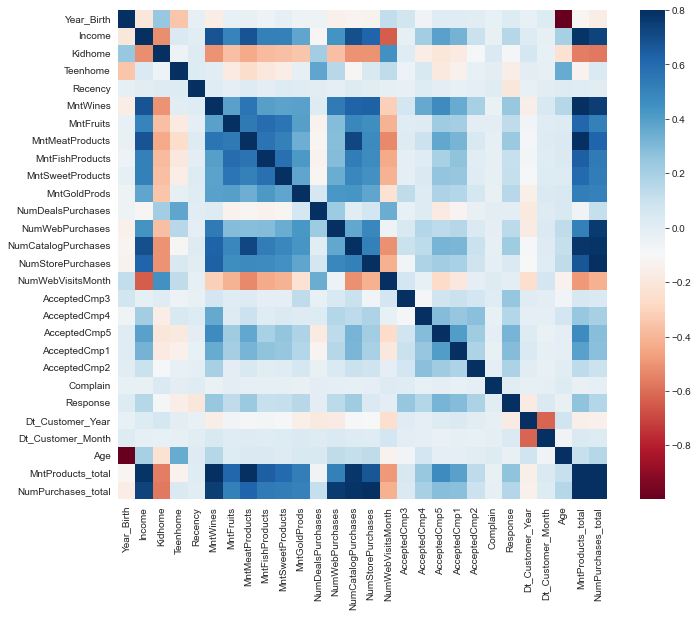

In [98]:
# correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='RdBu')

Distribution for income and recency

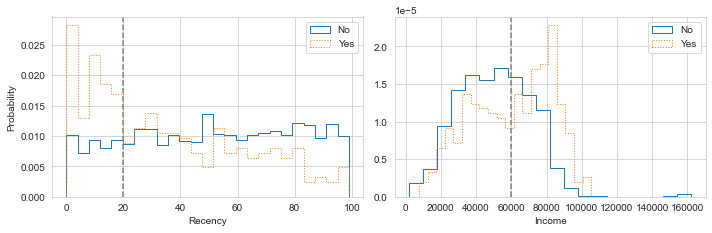

In [104]:
f, ax = plt.subplots(figsize=(10, 6))

ax1 = plt.subplot(2, 2, 1)
bins = 25
plt.hist(df[df.Response == 0].Recency,
         bins=bins,
         label="No",
         density=True,
         histtype="step",
         lw=1)
plt.hist(df[df.Response == 1].Recency,
         bins=bins,
         label="Yes",
         density=True,
         histtype="step",
         ls=":")
plt.axvline(x=20, color='gray', linestyle='--')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Recency')
ax1.legend()

ax2 = plt.subplot(2, 2, 2)
bins = 20
plt.hist(df[df.Response == 0].Income,
         bins=bins,
         label="No",
         density=True,
         histtype="step",
         lw=1)
plt.hist(df[df.Response == 1].Income,
         bins=bins,
         label="Yes",
         density=True,
         histtype="step",
         ls=":")
plt.axvline(x=60000, color='gray', linestyle='--')
ax2.set_xlabel('Income')

ax2.legend()
plt.tight_layout()

- The distribution for recency for yes there's a maximum between 0 and 20. It allows us to infer that most of the yes were between 0 and 20.
- There's a sharp clear increase in yes for incomes higher than 60000, while the no decrease.

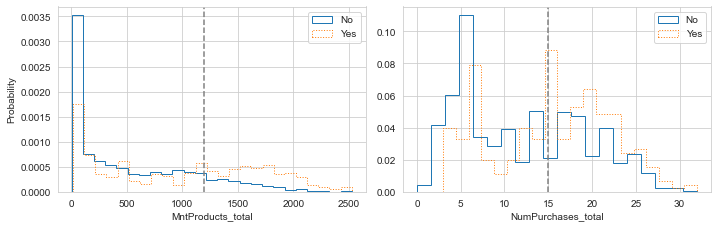

In [114]:
f, ax = plt.subplots(figsize=(10, 6))

ax1 = plt.subplot(2, 2, 1)
bins = 25
plt.hist(df[df.Response == 0].MntProducts_total,
         bins=bins,
         label="No",
         density=True,
         histtype="step",
         lw=1)
plt.hist(df[df.Response == 1].MntProducts_total,
         bins=bins,
         label="Yes",
         density=True,
         histtype="step",
         ls=":")
plt.axvline(x=1200, color='gray', linestyle='--')
ax1.set_ylabel('Probability')
ax1.set_xlabel('MntProducts_total')
ax1.legend()

ax2 = plt.subplot(2, 2, 2)
bins = 20
plt.hist(df[df.Response == 0].NumPurchases_total,
         bins=bins,
         label="No",
         density=True,
         histtype="step",
         lw=1)
plt.hist(df[df.Response == 1].NumPurchases_total,
         bins=bins,
         label="Yes",
         density=True,
         histtype="step",
         ls=":")
plt.axvline(x=15, color='gray', linestyle='--')
ax2.set_xlabel('NumPurchases_total')

ax2.legend()
plt.tight_layout()

- The distribution for MntProducts_total for no there's a maximum between 0 and 500.
- The distribution for MntProducts_total in yes is higher than 1500.

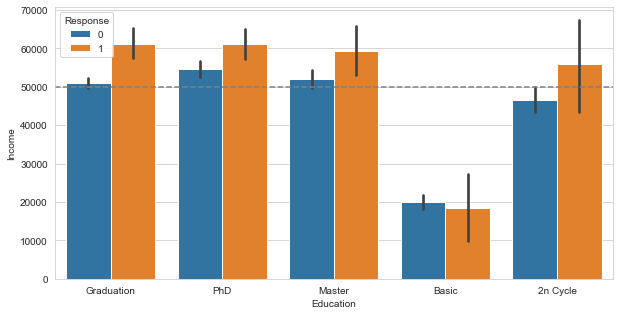

In [122]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y='Income', x='Education', hue="Response", data=df)
plt.axhline(y=50000, color='gray', linestyle='--')

The customers income distribution, as expected, varies according to the education level. Customers with only basic education have lower income.

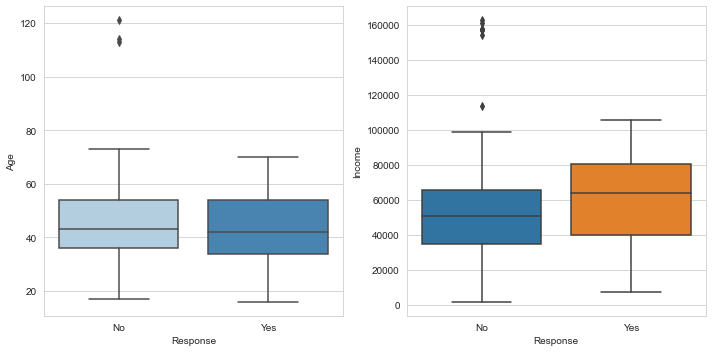

In [126]:
f, ax = plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1)
ax1 = sns.boxplot(y='Age', x='Response', data=df, palette="Blues")
ax1.set_xticklabels(['No', 'Yes'])
plt.subplot(1, 2, 2)
ax2 = sns.boxplot(y='Income', x='Response', data=df)
ax2.set_xticklabels(['No', 'Yes'])
plt.tight_layout()

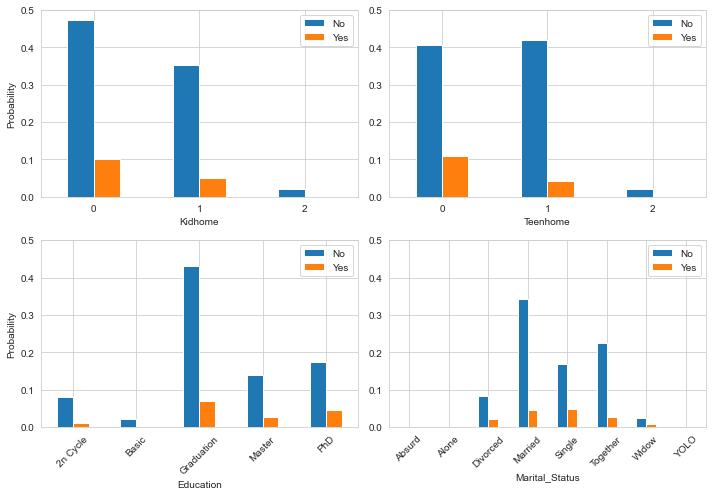

In [125]:
def prob_df(variable):
    rating_probs_no = pd.DataFrame(
        df[df.Response == 0].groupby(variable).size().div(len(df)))
    rating_probs_yes = pd.DataFrame(
        df[df.Response == 1].groupby(variable).size().div(len(df)))
    df_2 = rating_probs_no.merge(rating_probs_yes,
                                 how='outer',
                                 left_index=True,
                                 right_index=True)
    df_2.columns = ['No', 'Yes']
    return df_2


fig, axes = plt.subplots(2, 2, figsize=(10, 7))
prob_df('Kidhome').plot(ax=axes[0, 0], kind='bar', ylim=(0, 0.5), rot=0)
axes[0, 0].set_ylabel('Probability')
prob_df('Teenhome').plot(ax=axes[0, 1], kind='bar', ylim=(0, 0.5), rot=0)
prob_df('Education').plot(ax=axes[1, 0], kind='bar', ylim=(0, 0.5), rot=45)
axes[1, 0].set_ylabel('Probability')
prob_df('Marital_Status').plot(ax=axes[1, 1],
                               kind='bar',
                               ylim=(0, 0.5),
                               rot=45)
plt.tight_layout()

The graph above show some probabilities (yes or no) for certain features.

To summarize, people who live alone and have a higher educational level have more chances of saying yes, while less educated with larger families are less prone to say yes.

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


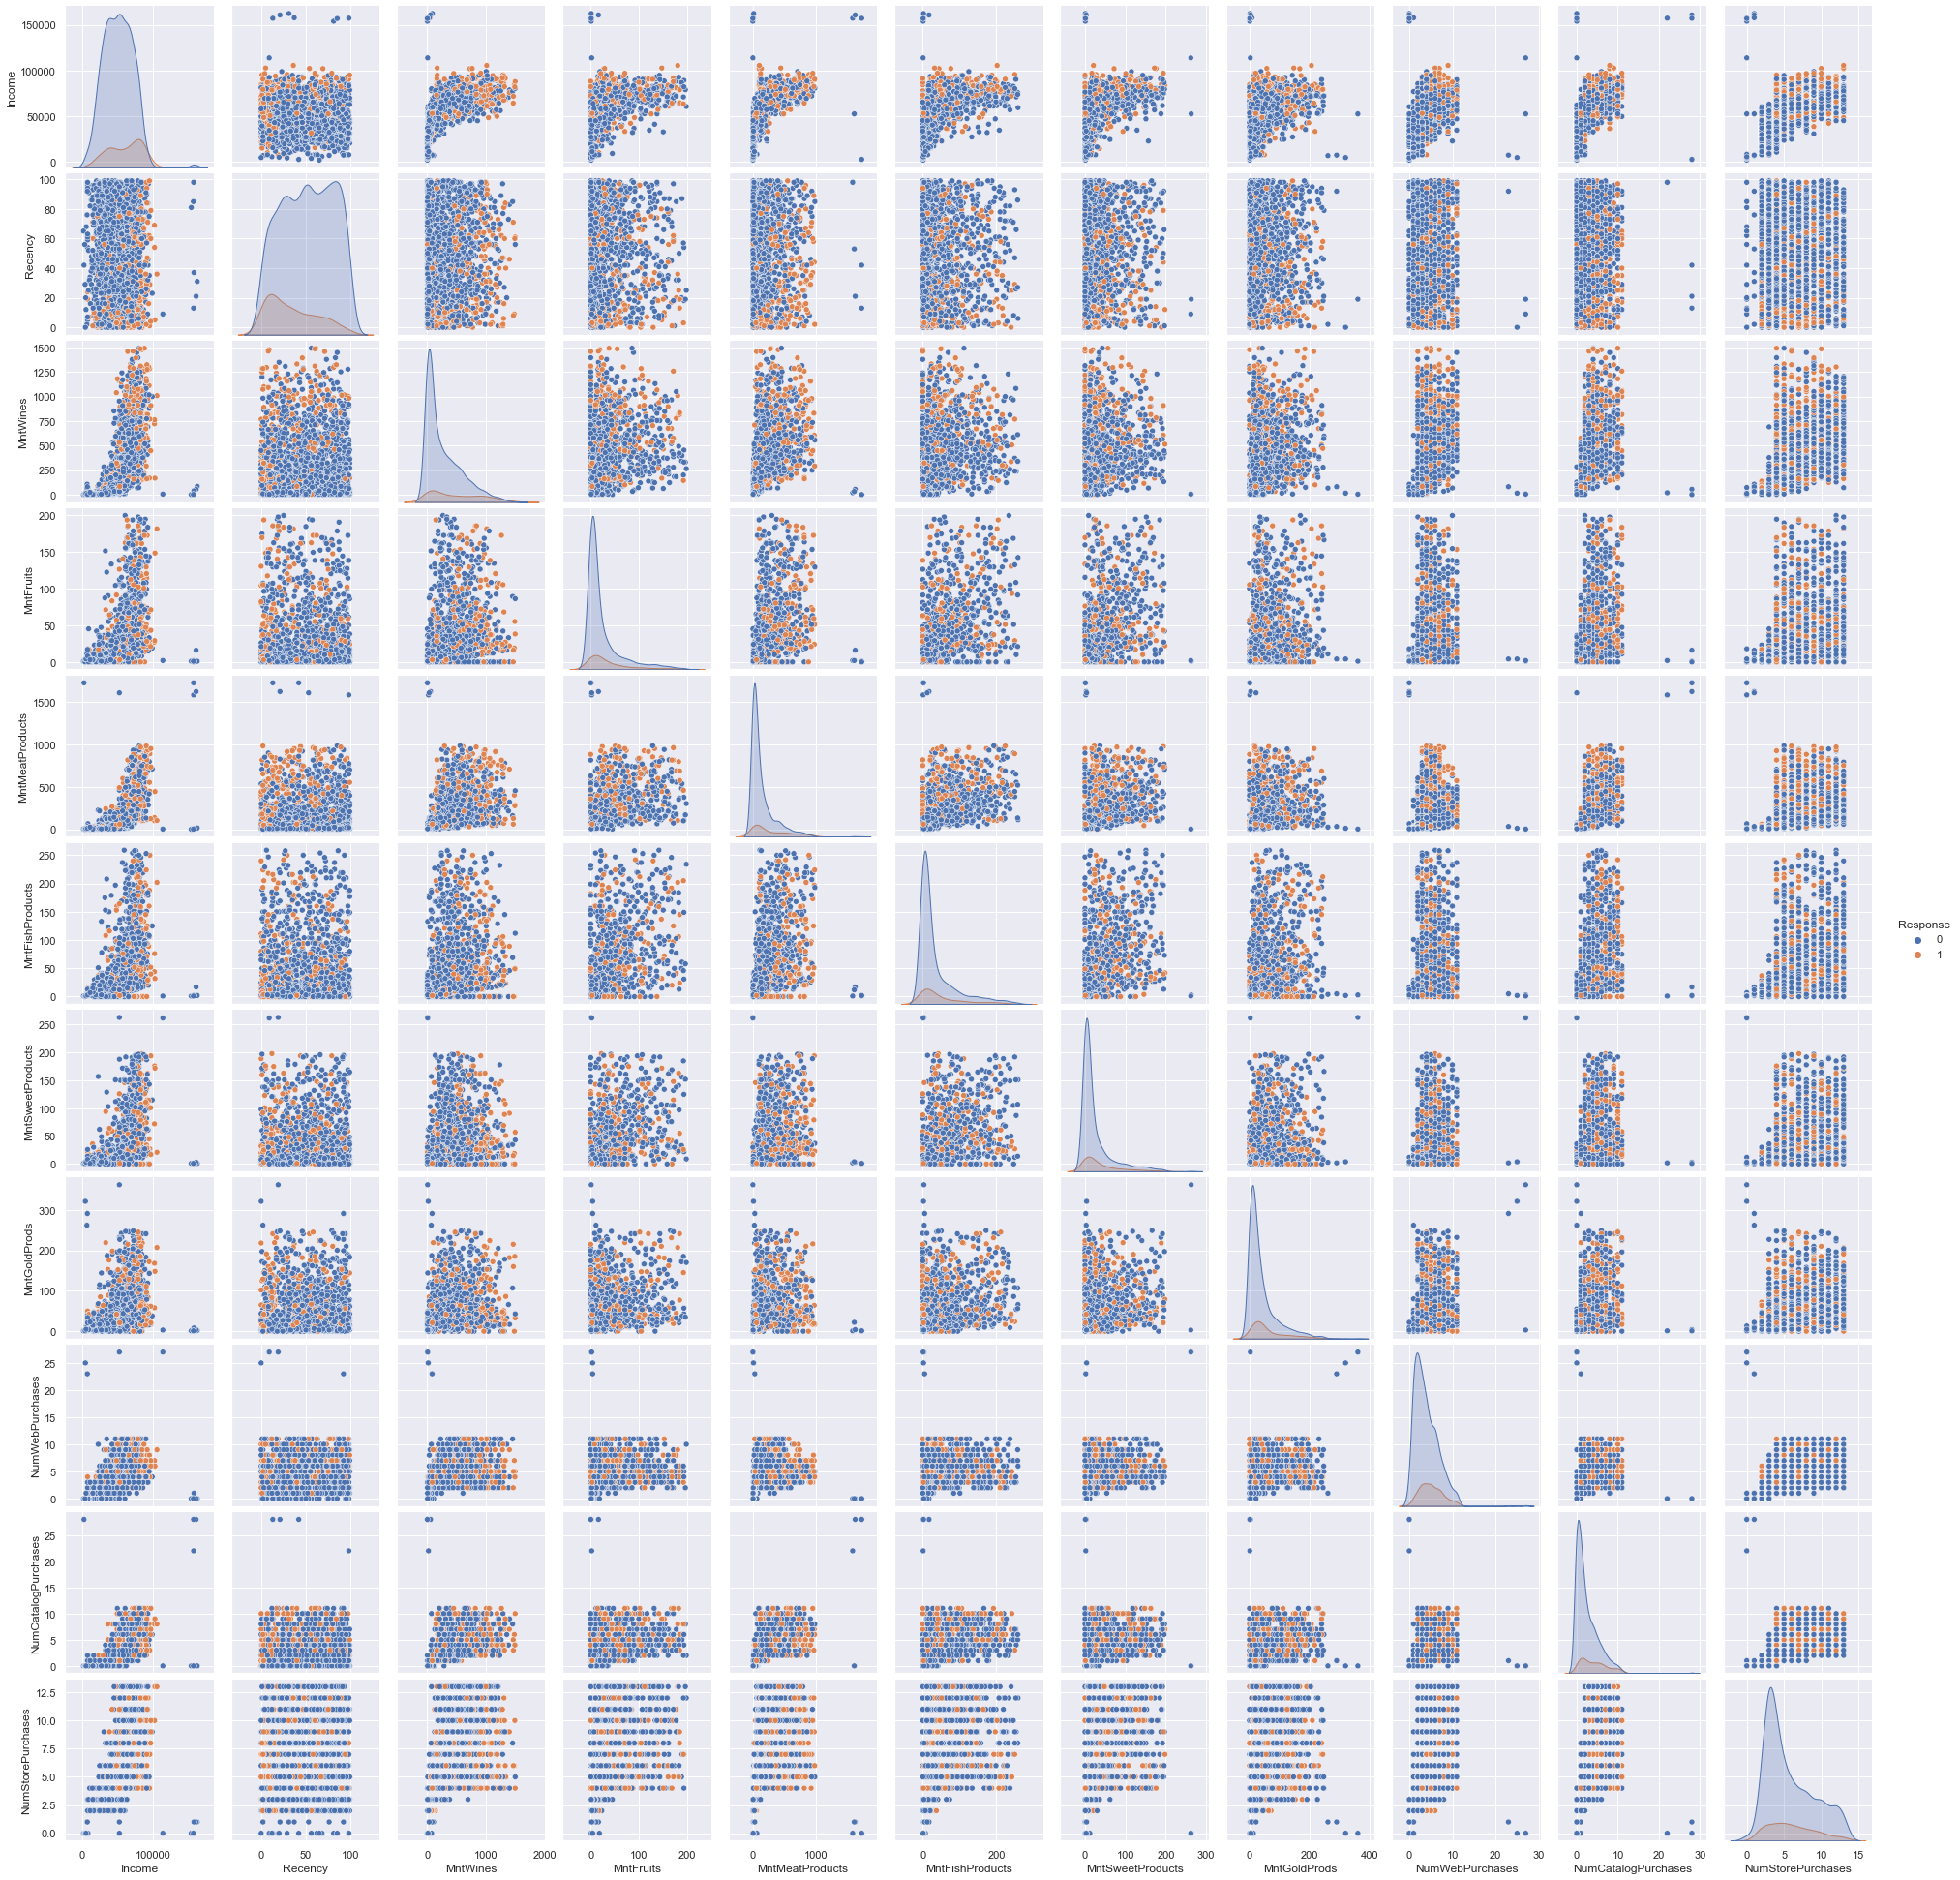

In [136]:
# scatterplot
sns.set()
cols = ['Income', 'Recency', 'Response', 'MntWines', 'MntFruits', 'MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
        'NumCatalogPurchases', 'NumStorePurchases']
sns.pairplot(df[cols], size = 2.5, hue="Response")
plt.show()

The last graph shows some relationships between variables. It becomes difficult to understand some of the relationships, but again income shows linear relationships between the variables.

### Data overview

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

### Data Exploration - Personal

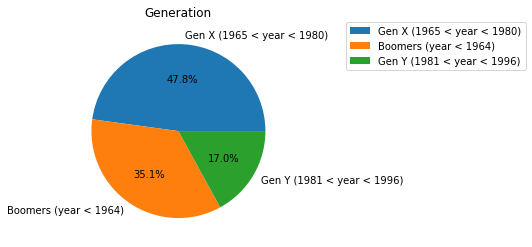

In [26]:
# Generation
df['Generation'].value_counts().sort_values(ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')
plt.title('Generation')
plt.show()

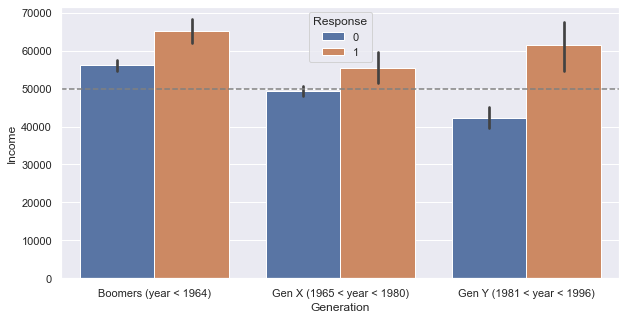

In [133]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y='Income', x='Generation', hue="Response", data=df)
plt.axhline(y=50000, color='gray', linestyle='--')

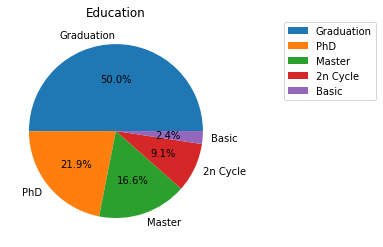

In [27]:
# Education
df['Education'].value_counts().sort_values(ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')
plt.title('Education')
plt.show()

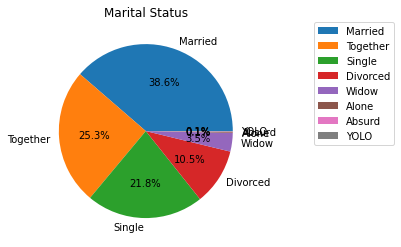

In [28]:
# Marital_Status
df['Marital_Status'].value_counts().sort_values(ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')
plt.title('Marital Status')
plt.show()

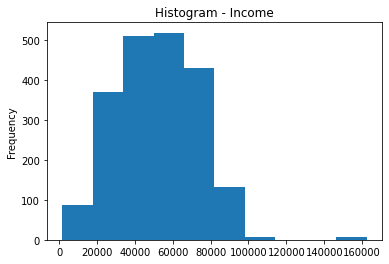

Income
Mean: 52059.15


In [39]:
# Income
df['Income'].plot.hist()
plt.title('Histogram - Income')
plt.show()
print('Income\nMean:', round(df['Income'].mean(), 2))

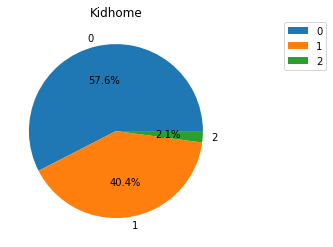

In [33]:
# Kidhome
df['Kidhome'].value_counts().sort_values(ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')
plt.title('Kidhome')
plt.show()

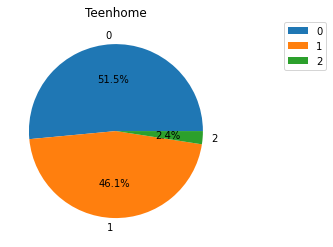

In [34]:
# Teenhome
df['Teenhome'].value_counts().sort_values(ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')
plt.title('Teenhome')
plt.show()

### Data Exploration - Consumption

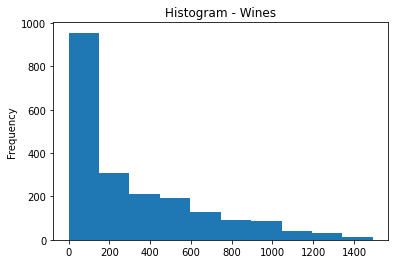

Wines
Mean: 304.07
Zeros: 0.58 %


In [68]:
# Wines
df['MntWines'].plot.hist()
plt.title('Histogram - Wines')
plt.show()
print('Wines\nMean:', round(df['MntWines'].mean(), 2))
print('Zeros:', round((df['MntWines']==0).sum() / df.shape[0] * 100, 2), '%')

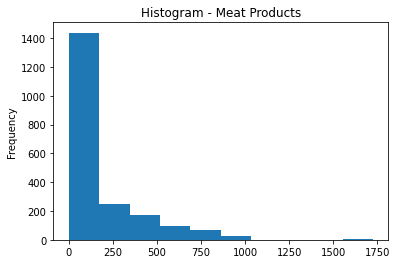

Meat Products
Mean: 167.78
Zeros: 0.05 %


In [69]:
# Meat Products
df['MntMeatProducts'].plot.hist()
plt.title('Histogram - Meat Products')
plt.show()
print('Meat Products\nMean:', round(df['MntMeatProducts'].mean(), 2))
print('Zeros:', round((df['MntMeatProducts']==0).sum() / df.shape[0] * 100, 2), '%')

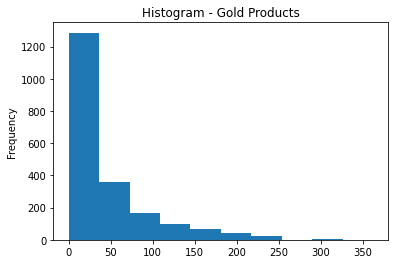

Gold Products
Mean: 43.89
Zeros: 2.77 %


In [70]:
# Gold Products
df['MntGoldProds'].plot.hist()
plt.title('Histogram - Gold Products')
plt.show()
print('Gold Products\nMean:', round(df['MntGoldProds'].mean(), 2))
print('Zeros:', round((df['MntGoldProds']==0).sum() / df.shape[0] * 100, 2), '%')

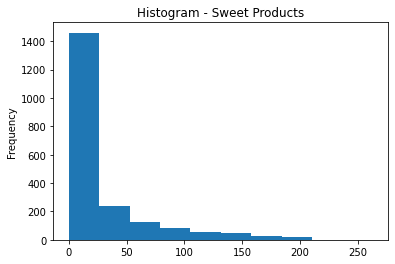

Sweet Products
Mean: 27.19
Zeros: 18.77 %


In [71]:
# Sweet Products
df['MntSweetProducts'].plot.hist()
plt.title('Histogram - Sweet Products')
plt.show()
print('Sweet Products\nMean:', round(df['MntSweetProducts'].mean(), 2))
print('Zeros:', round((df['MntSweetProducts']==0).sum() / df.shape[0] * 100, 2), '%')

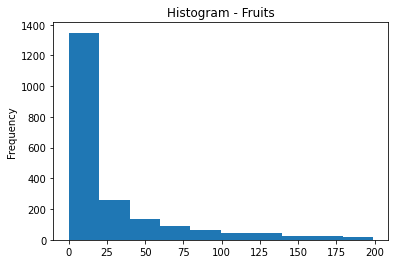

Fruits
Mean: 26.24
Zeros: 17.89 %


In [72]:
# Fruits
df['MntFruits'].plot.hist()
plt.title('Histogram - Fruits')
plt.show()
print('Fruits\nMean:', round(df['MntFruits'].mean(), 2))
print('Zeros:', round((df['MntFruits']==0).sum() / df.shape[0] * 100, 2), '%')

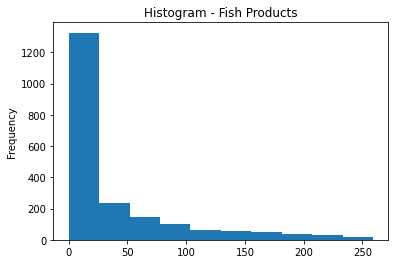

Fish Products
Mean: 37.34
Zeros: 17.45 %


In [73]:
# Fish Products
df['MntFishProducts'].plot.hist()
plt.title('Histogram - Fish Products')
plt.show()
print('Fish Products\nMean:', round(df['MntFishProducts'].mean(), 2))
print('Zeros:', round((df['MntFishProducts']==0).sum() / df.shape[0] * 100, 2), '%')

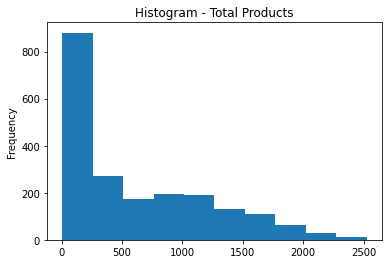

Total Products
Mean: 606.51
Zeros: 0.0 %
Total Products range 0 - 600: 58.82 %


In [77]:
# Total Products
df['MntProducts_total'].plot.hist()
plt.title('Histogram - Total Products')
plt.show()
print('Total Products\nMean:', round(df['MntProducts_total'].mean(), 2))
print('Zeros:', round((df['MntProducts_total']==0).sum() / df.shape[0] * 100, 2), '%')
print('Total Products range 0 - 600:',
      round((df['MntProducts_total_range'].value_counts()[0] +
             df['MntProducts_total_range'].value_counts()[1] +
             df['MntProducts_total_range'].value_counts()[2] +
             df['MntProducts_total_range'].value_counts()[4] +
             df['MntProducts_total_range'].value_counts()[3] +
             df['MntProducts_total_range'].value_counts()[10]) / df.shape[0] * 100, 2), '%')

### Total spent by product

Text(0, 0.5, '')

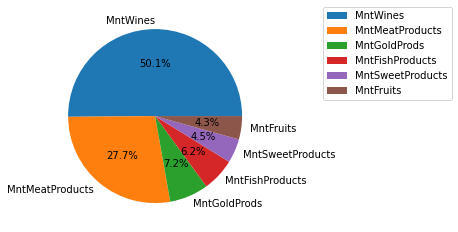

In [88]:
df_products = pd.DataFrame()

for i in ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']:
    df_products[i] = [df[i].sum()]

df_products.T.sort_values(by=0, ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')

### Data Exploration - Purchases

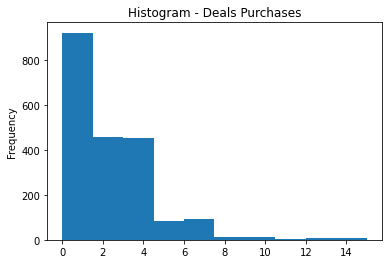

Deals Purchases
Mean: 2.34
Zeros: 2.04 %


In [78]:
# Deals Purchases
df['NumDealsPurchases'].plot.hist()
plt.title('Histogram - Deals Purchases')
plt.show()
print('Deals Purchases\nMean:', round(df['NumDealsPurchases'].mean(), 2))
print('Zeros:', round((df['NumDealsPurchases']==0).sum() / df.shape[0] * 100, 2), '%')

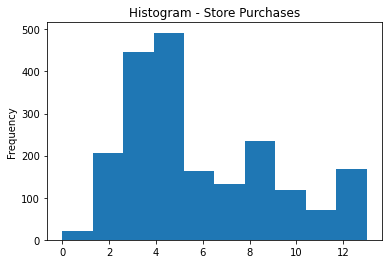

Store Purchases
Mean: 5.77
Zeros: 0.73 %


In [79]:
# Store Purchases
df['NumStorePurchases'].plot.hist()
plt.title('Histogram - Store Purchases')
plt.show()
print('Store Purchases\nMean:', round(df['NumStorePurchases'].mean(), 2))
print('Zeros:', round((df['NumStorePurchases']==0).sum() / df.shape[0] * 100, 2), '%')

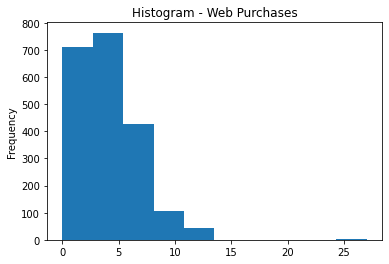

Web Purchases
Mean: 4.1
Zeros: 2.19 %


In [80]:
# Web Purchases
df['NumWebPurchases'].plot.hist()
plt.title('Histogram - Web Purchases')
plt.show()
print('Web Purchases\nMean:', round(df['NumWebPurchases'].mean(), 2))
print('Zeros:', round((df['NumWebPurchases']==0).sum() / df.shape[0] * 100, 2), '%')

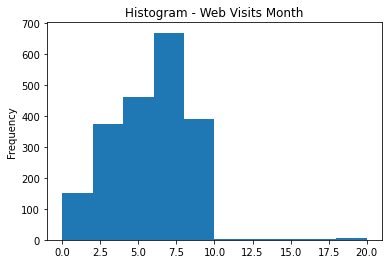

Web Visits Month
Mean: 5.32
Zeros: 0.53 %


In [81]:
# Web Visits Month
df['NumWebVisitsMonth'].plot.hist()
plt.title('Histogram - Web Visits Month')
plt.show()
print('Web Visits Month\nMean:', round(df['NumWebVisitsMonth'].mean(), 2))
print('Zeros:', round((df['NumWebVisitsMonth']==0).sum() / df.shape[0] * 100, 2), '%')

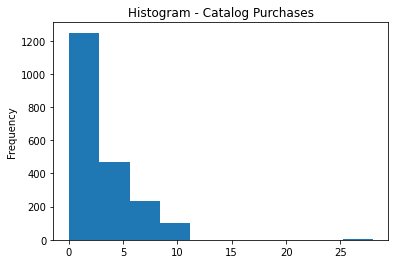

Catalog Purchases
Mean: 2.66
Zeros: 26.11 %


In [82]:
# Catalog Purchases
df['NumCatalogPurchases'].plot.hist()
plt.title('Histogram - Catalog Purchases')
plt.show()
print('Catalog Purchases\nMean:', round(df['NumCatalogPurchases'].mean(), 2))
print('Zeros:', round((df['NumCatalogPurchases']==0).sum() / df.shape[0] * 100, 2), '%')

### Total purchases by Store - Web - Catalog

Text(0, 0.5, '')

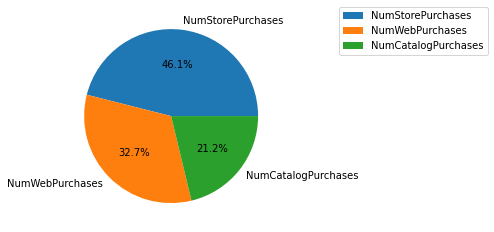

In [87]:
df_purchases = pd.DataFrame()

for i in ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']:
    df_purchases[i] = [df[i].sum()]

df_purchases.T.sort_values(by=0, ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')

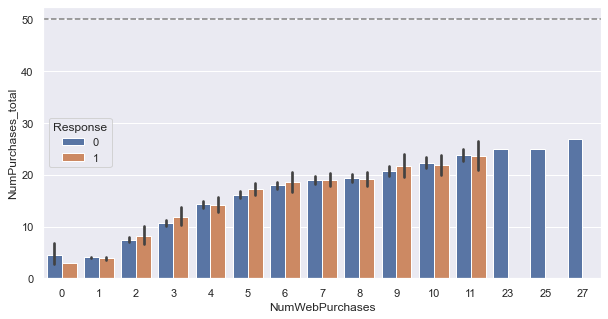

In [144]:
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(y='NumPurchases_total', x='NumWebPurchases', hue="Response", data=df)
plt.axhline(y=50, color='gray', linestyle='--')

### Data Exploration - Campaigns

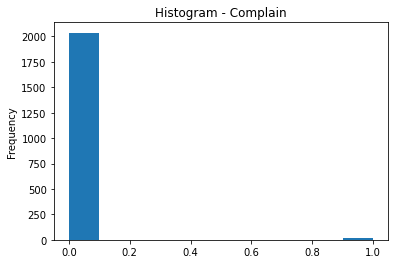

Complain
Mean: 0.01
Zeros: 99.03 %


In [83]:
# Complain
df['Complain'].plot.hist()
plt.title('Histogram - Complain')
plt.show()
print('Complain\nMean:', round(df['Complain'].mean(), 2))
print('Zeros:', round((df['Complain']==0).sum() / df.shape[0] * 100, 2), '%')

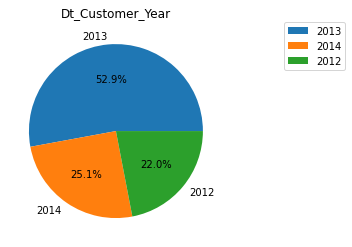

In [84]:
# Dt_Customer_Year
df['Dt_Customer_Year'].value_counts().sort_values(ascending=False).plot.pie(subplots=True, autopct='%.1f%%')
plt.legend(bbox_to_anchor=(1.25,1.025), loc="upper left")
plt.ylabel('')
plt.title('Dt_Customer_Year')
plt.show()

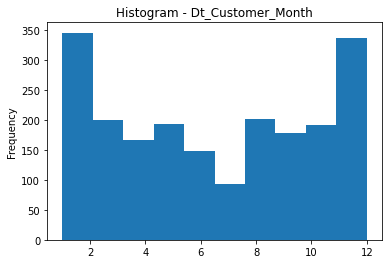

In [86]:
# Dt_Customer_Month
df['Dt_Customer_Month'].plot.hist()
plt.title('Histogram - Dt_Customer_Month')
plt.show()

In [59]:
df_accepted = pd.DataFrame()

list_accepted = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
list_0 = [df[i].value_counts()[0] for i in list_accepted]
list_1 = [df[i].value_counts()[1] for i in list_accepted]

df_accepted['id'] = list_accepted
df_accepted[0] = list_0
df_accepted[1] = list_1
df_accepted = df_accepted.set_index('id')

### Campaign evolution - Recused: 0 - Accepted: 1

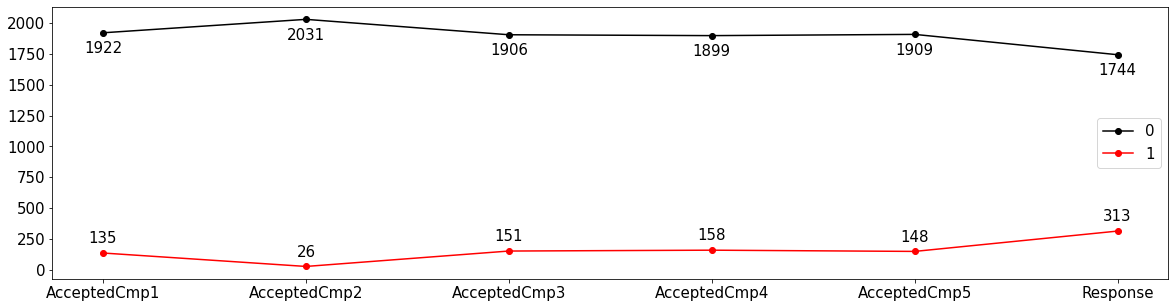

In [60]:
df_accepted.plot.line(marker='o', color=['black', 'red'], figsize=(20,5))

for x,y in zip(range(len(list_0)), list_0):
    plt.annotate(y, (x,y), textcoords="offset points", xytext=(0,-20), ha='center', fontsize=15)

for x,y in zip(range(len(list_1)), list_1):
    plt.annotate(y, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('')
plt.show()

### Data Exploration - Response

In [26]:
df_accept = df[df['Response']==1]
df_reject = df[df['Response']==0]

In [ ]:
# Analysis for Response = 1
profile = ProfileReport(df_accept, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

In [ ]:
# Analysis for Response = 0
profile = ProfileReport(df_reject, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()